In [235]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [236]:
m = 113.44
x = 300 * random.rand(30_000)
c = 3000

y = m*x + c

max = 4606

In [237]:
y

array([ 9344.70115183, 18516.14653843, 19380.18948903, ...,
       30513.4530402 , 23180.63231422, 14068.0572153 ])

In [238]:
y_inacc = []
r_inacc = []
i = 300
while i < 30_000:
    r = np.random.normal(0,1)
    temp = y[i] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    i += 1

In [239]:
y_inacc = np.array(y_inacc)

In [240]:
y_inacc

array([ 9443.36344518,  5994.73401243, 37558.43453453, ...,
       33585.87963773, 23874.4357519 , 15333.91519283])

In [241]:
len(y_inacc)

29700

In [242]:
y = y[:-29700]
len(y)

300

In [243]:
y = np.concatenate((y, y_inacc))
y

array([ 9344.70115183, 18516.14653843, 19380.18948903, ...,
       33585.87963773, 23874.4357519 , 15333.91519283])

In [244]:
len(y)

30000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


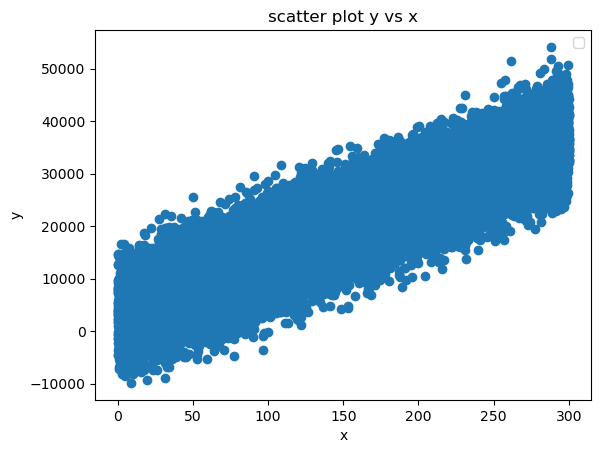

In [245]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

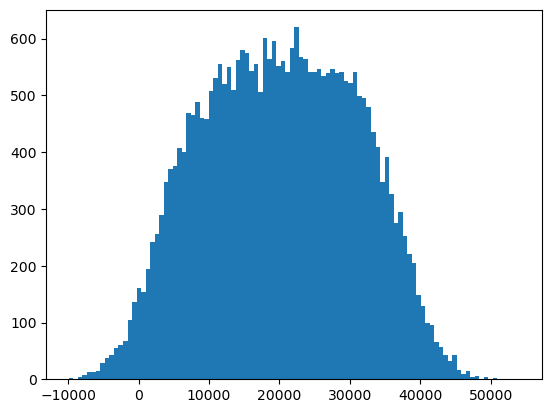

In [246]:
plt.hist(y_inacc,100)
plt.show